In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load credit scoring dataset
df = pd.read_csv("C:/Users/Gangadhar/Downloads/credit_risk_dataset.csv")

# Drop missing values
df.dropna(inplace=True)

# Binary encoding for default field
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'])

# Separate features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status'].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM input (samples, timesteps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, stratify=y, random_state=42)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)


Epoch 1/10


C:\Users\Gangadhar\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7761 - loss: 0.5165 - val_accuracy: 0.8560 - val_loss: 0.3393
Epoch 2/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8601 - loss: 0.3386 - val_accuracy: 0.8817 - val_loss: 0.3044
Epoch 3/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8777 - loss: 0.3150 - val_accuracy: 0.8896 - val_loss: 0.2888
Epoch 4/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8799 - loss: 0.3065 - val_accuracy: 0.8926 - val_loss: 0.2797
Epoch 5/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8853 - loss: 0.2971 - val_accuracy: 0.8948 - val_loss: 0.2789
Epoch 6/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8891 - loss: 0.2920 - val_accuracy: 0.8966 - val_loss: 0.2741
Epoch 7/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8870 - loss: 0.2963 - val_accuracy: 0.8970 - val_loss: 0.2715
Epoch 8/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8889 - loss: 0.2867 - val_accuracy: 0.8992 - val_

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Metrics
lstm_accuracy = accuracy_score(y_test, y_pred)
lstm_precision = precision_score(y_test, y_pred)
lstm_recall = recall_score(y_test, y_pred)
lstm_f1 = f1_score(y_test, y_pred)
lstm_auc = roc_auc_score(y_test, y_pred_probs)

# Output
print("LSTM Evaluation Metrics:")
print(f"Accuracy:  {lstm_accuracy:.4f}")
print(f"Precision: {lstm_precision:.4f}")
print(f"Recall:    {lstm_recall:.4f}")
print(f"F1-Score:  {lstm_f1:.4f}")
print(f"AUC:       {lstm_auc:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM Evaluation Metrics:
Accuracy:  0.8944
Precision: 0.8907
Recall:    0.5842
F1-Score:  0.7056
AUC:       0.9064


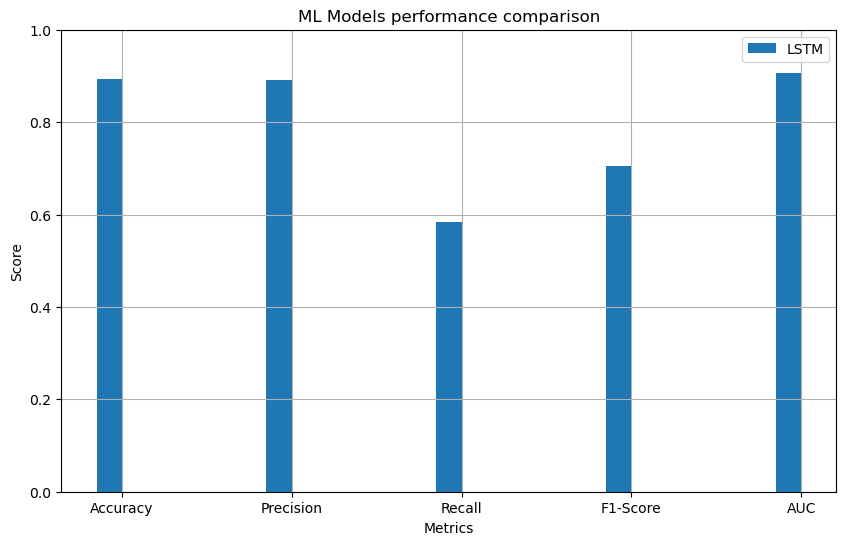

In [22]:
import matplotlib.pyplot as plt

# Replace/add these with your actual models as needed
model_metrics = {
    'LSTM': {
        'Accuracy': lstm_accuracy,
        'Precision': lstm_precision,
        'Recall': lstm_recall,
        'F1-Score': lstm_f1,
        'AUC': lstm_auc
    },
    # Example for others:
    # 'Random Forest': {...}, 'XGBoost': {...}
}

# Plotting
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics_names))
width = 0.15

plt.figure(figsize=(10, 6))

for i, (model_name, scores) in enumerate(model_metrics.items()):
    plt.bar(x + i * width, [scores[m] for m in metrics_names], width=width, label=model_name)

plt.xticks(x + width / 2, metrics_names)
plt.ylim(0, 1)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("ML Models performance comparison")
plt.legend()
plt.grid(True)
plt.show()
